# 야후 파이낸스로 주식 시세 구하기

#### 사전 설치 - yfinance, pandas-datareader

In [1]:
pip install yfinance

  Obtaining dependency information for yfinance from https://files.pythonhosted.org/packages/d5/b5/70bb98ee38ce532ee29fab76fb668382291fe6e1aa69a8c1ac7e6bc108e7/yfinance-0.2.38-py2.py3-none-any.whl.metadata
  Obtaining dependency information for multitasking>=0.0.7 from https://files.pythonhosted.org/packages/3e/8a/bb3160e76e844db9e69a413f055818969c8acade64e1a9ac5ce9dfdcf6c1/multitasking-0.0.11-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/315.3 kB ? eta -:--:--
     --- ------------------------------------ 30.7/315.3 kB ? eta -:--:--
     -------------------------------------- 315.3/315.3 kB 6.6 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     ---------------

In [4]:
pip install pandas-datareader

  Obtaining dependency information for pandas-datareader from https://files.pythonhosted.org/packages/3f/16/56c9d648b503619ebe96f726b5f642b68e299b34162ed2d6faa9d7966b7d/pandas_datareader-0.10.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/109.5 kB ? eta -:--:--
   ---------------------------------------- 0.0/109.5 kB ? eta -:--:--
   -------------- ------------------------ 41.0/109.5 kB 653.6 kB/s eta 0:00:01
   ---------------------------------------- 109.5/109.5 kB 1.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


## 삼성전자, 마이크로소프트 주가 알아보기

In [5]:
from pandas_datareader import data as pdr
import yfinance as yf
yf. pdr_override()

sec = pdr.get_data_yahoo('005930.KS', start = '2024-01-01') #삼성전자 코드 : 005930.KS
msft = pdr.get_data_yahoo('MSFT', start = '2024-01-01') #마이크로소프트 코드 : MSFT

C:\Users\alswj\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [6]:
sec.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-01-02,78200.0,79800.0,78200.0,79600.0,79600.0,17142847
2024-01-03,78500.0,78800.0,77000.0,77000.0,77000.0,21753644
2024-01-04,76100.0,77300.0,76100.0,76600.0,76600.0,15324439
2024-01-05,76700.0,77100.0,76400.0,76600.0,76600.0,11304316
2024-01-08,77000.0,77500.0,76400.0,76500.0,76500.0,11088724
2024-01-09,77400.0,77700.0,74300.0,74700.0,74700.0,26019249
2024-01-10,75000.0,75200.0,73200.0,73600.0,73600.0,20259529
2024-01-11,72900.0,73600.0,72700.0,73200.0,73200.0,57691266
2024-01-12,73000.0,74100.0,72800.0,73100.0,73100.0,13038939


In [7]:
msft.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-01-02,373.859985,375.899994,366.769989,370.869995,370.185425,25258600
2024-01-03,369.010010,373.260010,368.510010,370.600006,369.915924,23083500
2024-01-04,370.670013,373.100006,367.170013,367.940002,367.260834,20901500
2024-01-05,368.970001,372.059998,366.500000,367.750000,367.071198,20987000
2024-01-08,369.299988,375.200012,369.010010,374.690002,373.998383,23134000
2024-01-09,372.010010,375.989990,371.190002,375.790009,375.096375,20830000
2024-01-10,376.369995,384.170013,376.320007,382.769989,382.063446,25514200
2024-01-11,386.000000,390.679993,380.380005,384.630005,383.920044,27850800
2024-01-12,385.489990,388.679993,384.649994,388.470001,387.752960,21645700


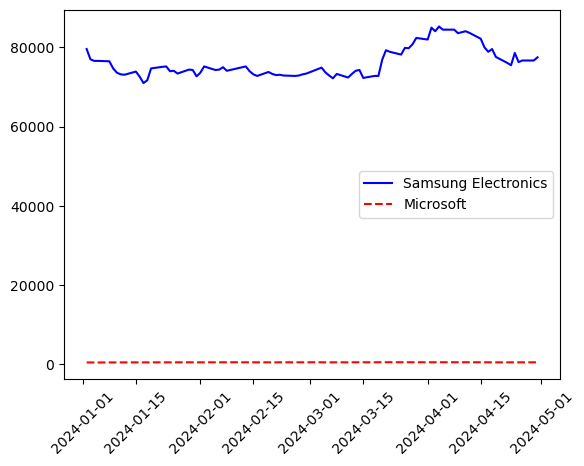

In [27]:
import matplotlib.pyplot as plt

plt.plot(sec.index, sec.Close, 'b', label = 'Samsung Electronics')
plt.plot(msft.index, msft.Close, 'r--', label = 'Microsoft')
plt.legend(loc='best') #범례의 위치를 알아서 잘 찾아준다.
plt.xticks(rotation=45)
plt.show()

## 수익률 알아보기
일간 변동률을 통해 주가긔 수익률을 비교할 수 있다.
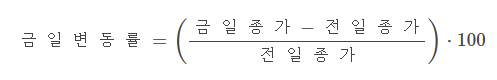

In [28]:
# 수익률 계산 : 수식 이미지 참고
sec_dpc = (sec['Close']/sec['Close'].shift(1)-1)*100 #shift는 데이터를 한 칸씩 이동시키는 역할 : 전일 종가
sec_dpc.iloc[0] = 0 #첫 날은 Nan이라, 0으로 변경
sec_dpc.head()

Date
2024-01-02    0.000000
2024-01-03   -3.266332
2024-01-04   -0.519481
2024-01-05    0.000000
2024-01-08   -0.130548
Name: Close, dtype: float64

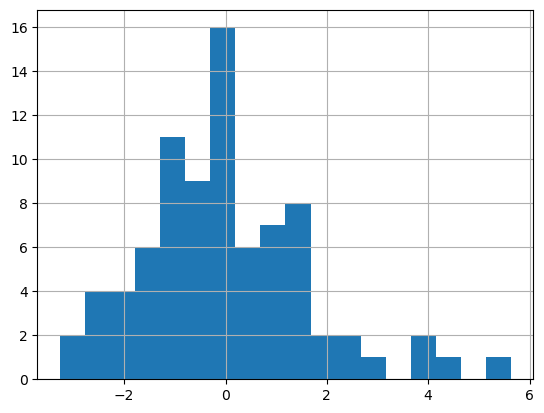

0 근처인 수익률이 가장 많음.
일반적으로 주가 수익률은 정규분포와 비슷하지만, 정규분포보다 중앙 부분이 더 뾰족하고 양쪽 꼬리가 더 두텁다. => 급첨 분포, 펫 테일


In [50]:
import matplotlib.pyplot as plt

plt.hist(sec_dpc, bins =18)
plt.grid(True)
plt.show()

print("0 근처인 수익률이 가장 많음.")
print("일반적으로 주가 수익률은 정규분포와 비슷하지만, 정규분포보다 중앙 부분이 더 뾰족하고 양쪽 꼬리가 더 두텁다. => 급첨 분포, 펫 테일")

In [42]:
#수익률의 정보
sec_dpc.describe()

count    82.000000
mean     -0.019193
std       1.653924
min      -3.266332
25%      -1.077083
50%      -0.127852
75%       0.961236
max       5.631868
Name: Close, dtype: float64

## 일간 변동률 누적합 구하기

In [43]:
# 수익률 계산 : 앞단계 참고
sec_dpc = (sec['Close']/sec['Close'].shift(1)-1)*100
sec_dpc.iloc[0] = 0 #첫 날은 Nan이라, 0으로 변경
sec_dpc_cs = sec_dpc.cumsum() #누적합

msft_dpc = (msft['Close']/msft['Close'].shift(1)-1)*100
msft_dpc.iloc[0] = 0
msft_dpc_sc = msft_dpc.cumsum() #누적합

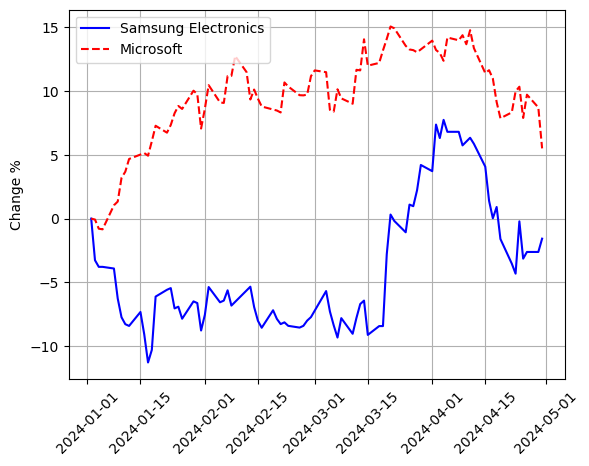

In [44]:
import matplotlib.pyplot as plt

plt.plot(sec.index, sec_dpc_cs, 'b', label = 'Samsung Electronics')
plt.plot(msft.index, msft_dpc_sc, 'r--', label = 'Microsoft')
plt.legend(loc='best')
plt.ylabel('Change %')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# 최대 손실 낙폭, MDD
특정 기간에 발생한 최고점에서 최저점까지의 가장 큰 손실
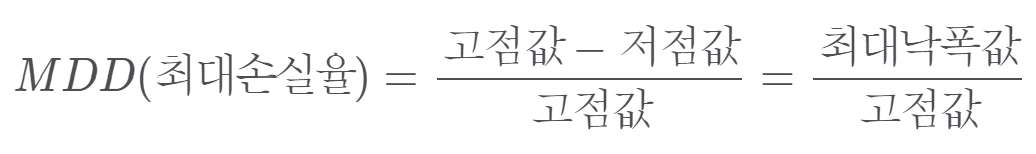

## KOSPI의 MDD 구하기

rolling() : 윈도우 크기에 해당하는 개수만큼 데이터를 추출해 집계 함수에 해당하는 연산을 실시한다.

In [46]:
kospi = pdr.get_data_yahoo('^KS11', '2004-01-04') #KOSPI 코드: ^KS11, 시작일: 2004년

window = 252 #1년 간의 개장일을 어림 잡은 값
peak = kospi['Adj Close'].rolling(window, min_periods=1).max() #1년 기간 중 고점값
drawdown = kospi['Adj Close']/peak - 1 #고점값 대비 현재 얼마나 하락했는지
max_dd = drawdown.rolling(window, min_periods=1).min()

[*********************100%%**********************]  1 of 1 completed


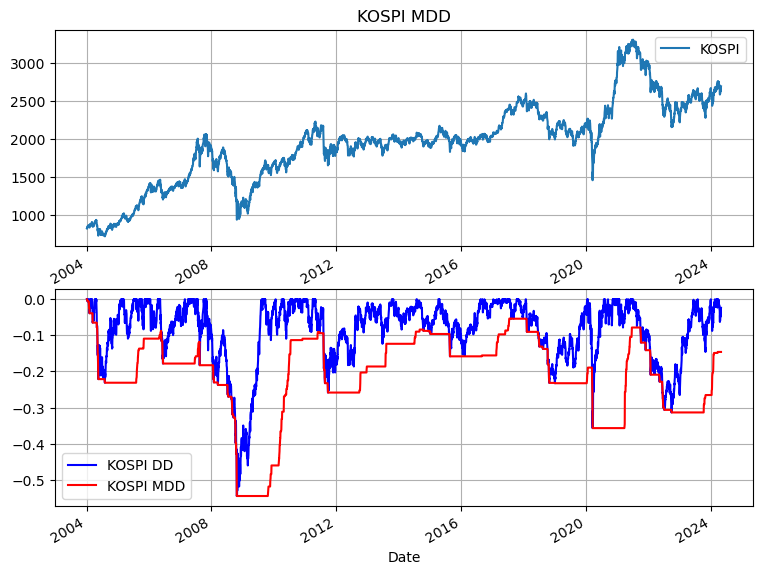

첫 번째 그래프: KOSPI 종가 그래프
두 번째 그래프: KOSPI DrawDown - 최고점 대비 현재 종가가 얼마나 하락했는지


In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9,7))
plt.subplot(211) #2행 1열 중 1행에 그린다. = 첫번째 그래프
kospi['Close'].plot(label='KOSPI', title = 'KOSPI MDD', grid=True, legend=True)

plt.subplot(212) #2행 1열 중 2행에 그린다. = 두번째 그래프
drawdown.plot(c = 'blue',label = 'KOSPI DD', grid = True, legend = True)
max_dd.plot(c ='red', label = 'KOSPI MDD', grid = True, legend = True)
plt.show()

print('첫 번째 그래프: KOSPI 종가 그래프')
print('두 번째 그래프: KOSPI DrawDown - 최고점 대비 현재 종가가 얼마나 하락했는지')

In [52]:
print('2004년부터 현재까지의 MDD :', max_dd.min())

2004년부터 현재까지의 MDD : -0.5453665130144085


In [54]:
#MDD를 기록한 기간

max_dd[max_dd == max_dd.min()]

Date
2008-10-24   -0.545367
2008-10-27   -0.545367
2008-10-28   -0.545367
2008-10-29   -0.545367
2008-10-30   -0.545367
                ...   
2009-10-16   -0.545367
2009-10-19   -0.545367
2009-10-20   -0.545367
2009-10-21   -0.545367
2009-10-22   -0.545367
Name: Adj Close, Length: 252, dtype: float64

2008년 10월 24일부터 2009년 10월 22일까지 1년 동안 max_dd의 최솟값과 일치했다.

# 회귀 분석과 상관관계
## KOSPI와 다우존스 지수 비교

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


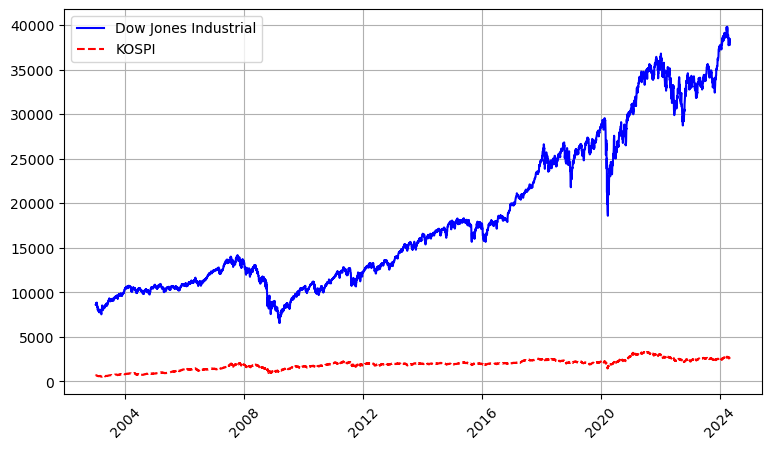

In [60]:
dow = pdr.get_data_yahoo('^DJI', start = '2003-01-02') #다우존스
kospi = pdr.get_data_yahoo('^KS11', start = '2003-01-02') #코스피

import matplotlib.pyplot as plt

plt.figure(figsize=(9,5))
plt.plot(dow.index, dow.Close, 'b', label = 'Dow Jones Industrial')
plt.plot(kospi.index, kospi.Close, 'r--', label = 'KOSPI')
plt.legend(loc='best')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

지수 기준값이 달라 비교가 어렵다.

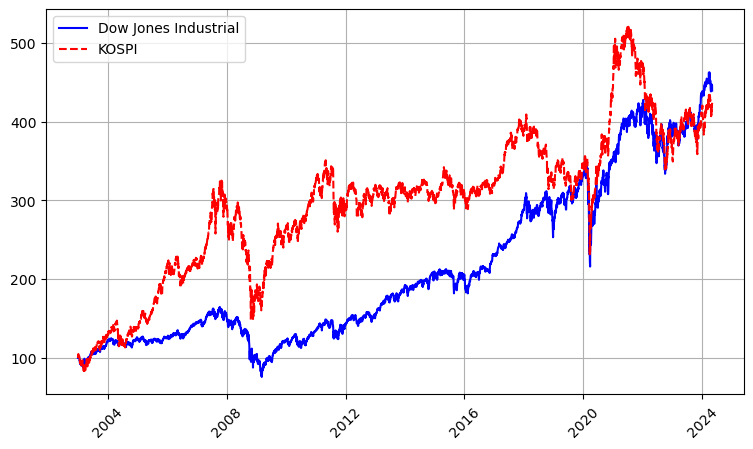

In [61]:
d = (dow.Close / dow.Close.loc['2003-01-02'])*100
k = (kospi.Close / kospi.Close.loc['2003-01-02'])*100

import matplotlib.pyplot as plt

plt.figure(figsize=(9,5))
plt.plot(d.index, d, 'b', label = 'Dow Jones Industrial')
plt.plot(k.index, k, 'r--', label = 'KOSPI')
plt.legend(loc='best')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

지수화 비교를 통해 한 눈에 상승률을 비교할 수 있다.

## 산점도 분석
x축을 다우존스 지수로 y축을 KOSPI 지수로 정해서 둘의 상관 관계를 비교

In [64]:
import pandas as pd

df = pd.DataFrame({'DOW':dow['Close'], 'KOSPI':kospi['Close']})
df

,DOW,KOSPI
Date,,
2003-01-02,8607.519531,635.169983
2003-01-03,8601.690430,661.099976
2003-01-06,8773.570312,666.710022
2003-01-07,8740.589844,652.200012
2003-01-08,8595.309570,651.719971
...,...,...
2024-04-24,38460.921875,2675.750000
2024-04-25,38085.800781,2628.620117
2024-04-26,38239.660156,2656.330078


In [65]:
df[df['DOW'].isnull()]

,DOW,KOSPI
Date,,
2003-01-20,NaN,634.500000
2003-02-17,NaN,601.869995
2003-04-18,NaN,624.770020
2003-05-26,NaN,617.650024
2003-07-04,NaN,693.250000
...,...,...
2023-09-04,NaN,2584.550049
2023-11-23,NaN,2514.959961
2024-01-15,NaN,2525.989990


하지만 다우, 코스피 두 데이터는 날짜가 동일하지 않아 위처럼 결측치가 생긴다. (KOSPI도 마찬가지로 결측치 존재)

In [66]:
df = df.fillna(method='bfill') #하루 뒤(bfill) 혹은 하루 전(ffill) 값으로 결측치를 메꿔준다.

C:\Users\alswj\AppData\Local\Temp\ipykernel_8012\2988147304.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='bfill') #하루 뒤(bfill) 혹은 하루 전(ffill) 값으로 결측치를 메꿔준다.


In [69]:
#결측치 확인
df[df['DOW'].isnull()]

,DOW,KOSPI
Date,,


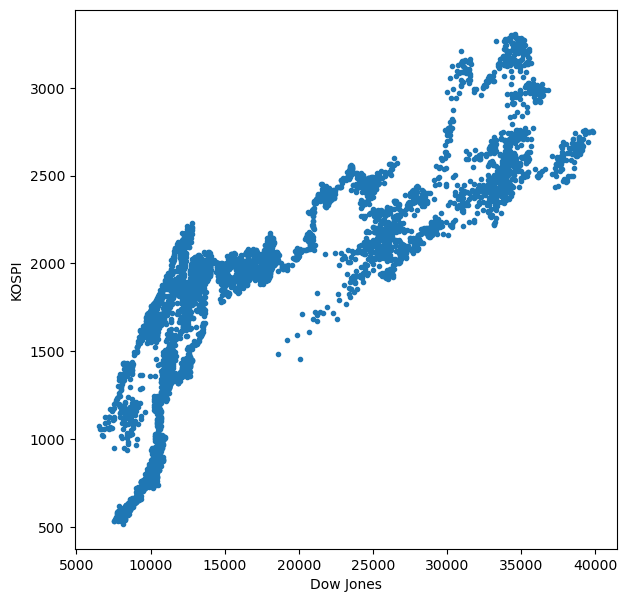

In [70]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,7))
plt.scatter(df['DOW'], df['KOSPI'], marker = '.')
plt.xlabel('Dow Jones')
plt.ylabel('KOSPI')
plt.show()

점의 분포가 y=x인 직선 형태에 가까울수록 직접적인 관계가 있다.

## 선형 회귀 분석 
상관관계를 분석하는 또다른 방법.
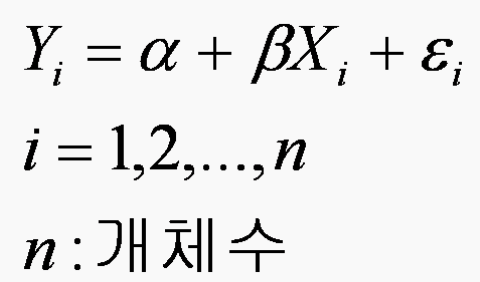

In [72]:
from scipy import stats
regr = stats.linregress(df['DOW'], df['KOSPI'])
regr

LinregressResult(slope=0.0559835504370721, intercept=857.6088498522918, rvalue=0.832577231116832, pvalue=0.0, stderr=0.000500899981989411, intercept_stderr=10.179189327616092)

기울기  = 0.0559835504370721

y절편 = 857.6088498522918

r값 = 0.832577231116832 : 여기선, 상관 계수를 의미. 1에 가까울수록 다우와 코스피는 서로 영향을 많이 미친다.

p값 = 0

표준편차 = 0.000500899981989411

## 상관 계수 구하기

위에서 구한 값이랑 일치하는 것을 볼 수 있다.

In [77]:
df.corr() # 또는
df['DOW'].corr(df['KOSPI'])

0.8325772311168318

In [75]:
r_value = df['DOW'].corr(df['KOSPI'])
r_value

0.8325772311168318

In [76]:
r_squared = r_value**2
r_squared

0.6931848457741704

## 상관 계수에 따른 리스크 완화
상관 관계가 낮은 자산을 대상으로 분산 투자를 하면 위험을 감소시킬 수 있다.

In [79]:
df

,DOW,KOSPI
Date,,
2003-01-02,8607.519531,635.169983
2003-01-03,8601.690430,661.099976
2003-01-06,8773.570312,666.710022
2003-01-07,8740.589844,652.200012
2003-01-08,8595.309570,651.719971
...,...,...
2024-04-24,38460.921875,2675.750000
2024-04-25,38085.800781,2628.620117
2024-04-26,38239.660156,2656.330078


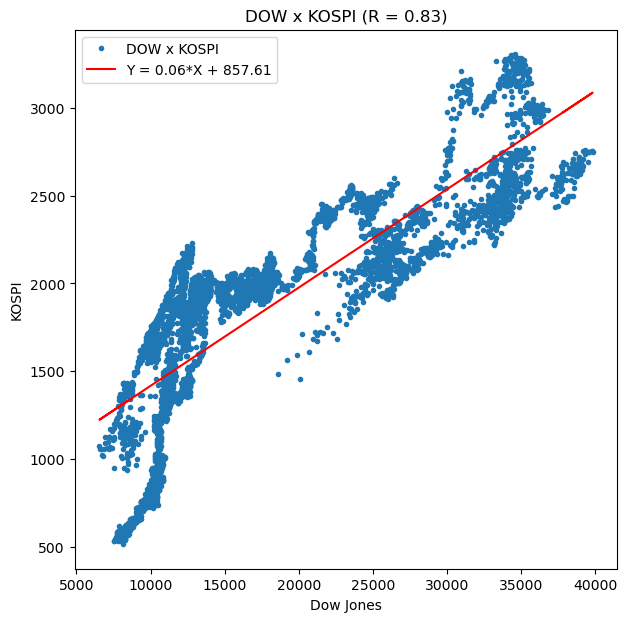

In [80]:
regr = stats.linregress(df.DOW, df.KOSPI)
regr_line = f'Y = {regr.slope:.2f}*X + {regr.intercept:.2f}'

plt.figure(figsize=(7,7))
plt.plot(df.DOW, df.KOSPI, '.')
plt.plot(df.DOW, regr.slope*df.DOW + regr.intercept,'r')
plt.legend(['DOW x KOSPI', regr_line])
plt.title(f'DOW x KOSPI (R = {regr.rvalue:.2f})')
plt.xlabel('Dow Jones')
plt.ylabel('KOSPI')
plt.show()

In [82]:
tlt = pdr.get_data_yahoo('TLT', start = '2003-01-02') #미국 국채 TLT
kospi = pdr.get_data_yahoo('^KS11', start = '2003-01-02') #코스피

df2 = pd.DataFrame({'TLT' : tlt['Close'], 'KOSPI': kospi['Close']})
df2

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,TLT,KOSPI
Date,,
2003-01-02,86.279999,635.169983
2003-01-03,86.480003,661.099976
2003-01-06,86.250000,666.710022
2003-01-07,86.559998,652.200012
2003-01-08,86.989998,651.719971
...,...,...
2024-04-24,88.400002,2675.750000
2024-04-25,87.779999,2628.620117
2024-04-26,88.239998,2656.330078


C:\Users\alswj\AppData\Local\Temp\ipykernel_8012\4007487531.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df2 = df2.fillna(method = 'bfill')


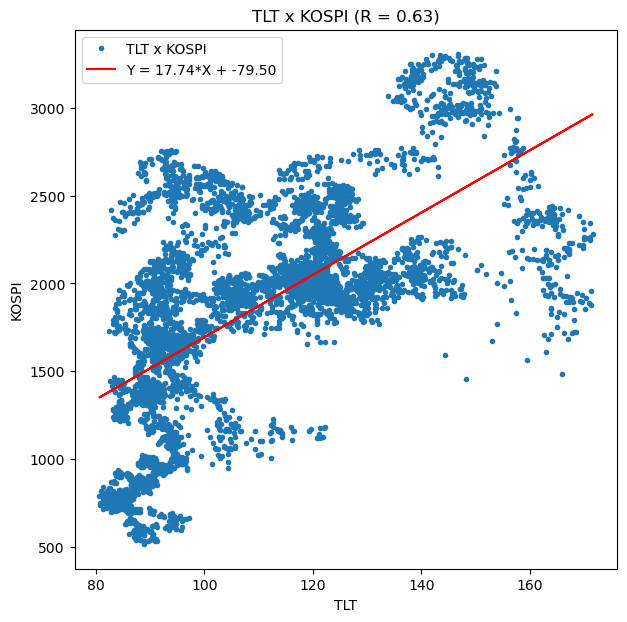

In [83]:
df2 = df2.fillna(method = 'bfill')

regr = stats.linregress(df2.TLT, df2.KOSPI)
regr_line = f'Y = {regr.slope:.2f}*X + {regr.intercept:.2f}'

plt.figure(figsize=(7,7))
plt.plot(df2.TLT, df2.KOSPI, '.')
plt.plot(df2.TLT, regr.slope*df2.TLT + regr.intercept,'r')
plt.legend(['TLT x KOSPI', regr_line])
plt.title(f'TLT x KOSPI (R = {regr.rvalue:.2f})')
plt.xlabel('TLT')
plt.ylabel('KOSPI')
plt.show()

그래프 비교 결과,

DOW x KOSPI 상관 계수 : 0.83

TLT x KOSPI 상관 계수 : 0.63

=> 리스크 감소를 위한 분할 투자에는 TLT x KOSPI 가 적합하다.